In [16]:
import geopandas as gpd

In [17]:
# geojson containing chennai zones outlines
chennai_zones = gpd.read_file("geojsons/chennai_zones.geojson")

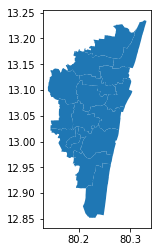

In [18]:
chennai_zones.plot()

In [19]:
# Zone 13 outline - velachery
zone13 = chennai_zones.geometry[13]

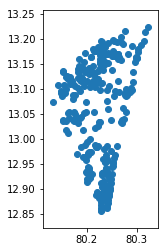

In [20]:
# Water sources in the city of chennai
chennai_water = gpd.read_file("geojsons/chennai_water.geojson")
chennai_water.plot()

In [21]:
from osmxtract import overpass

In [22]:
def get_geojson(bounds):
    query = overpass.ql_query(bounds, tag='building')
    response = overpass.request(query)
    return(response)

In [23]:
new_bound = (zone13.bounds[1],zone13.bounds[0],zone13.bounds[3],zone13.bounds[2])

In [24]:
buildings= get_geojson(new_bound)

In [25]:
buildings = overpass.as_geojson(buildings,"polygon")

In [26]:
buildings = gpd.GeoDataFrame.from_features(buildings)

In [27]:
bound_gdframe = gpd.GeoDataFrame({'geometry': [zone13]})

In [28]:
buildings = buildings[:10000]

In [ ]:
!conda install -c conda-forge libspatialindex=1.9.3 -y

In [30]:
buildings_in_zone13 = gpd.overlay(buildings, bound_gdframe, how='intersection')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/geopandas/base.py:105: UserWarning: Cannot generate spatial index: Missing package `rtree`.
  warn("Cannot generate spatial index: Missing package `rtree`.")


AttributeError: 'NoneType' object has no attribute 'intersection'

In [ ]:
buildings_in_zone13.plot()